In [1]:
%matplotlib inline

In [2]:
import sys
sys.path.insert(0,'..')
import pickle

import visualize
import datasets
import ldle
# Uncomment to reload a library
from importlib import reload 
visualize = reload(visualize)
ldle = reload(ldle)
datasets = reload(datasets)

matplotlib.get_backend() =  module://ipykernel.pylab.backend_inline
matplotlib.get_backend() =  module://ipykernel.pylab.backend_inline


In [3]:
save_dir_root = '../data/ldle1/mobiusstrip/'

In [4]:
X, labelsMat, ddX = datasets.Datasets().mobiusstrip3d()

X.shape =  (10580, 3)


# LDLE

In [5]:
ldle_obj = ldle.LDLE(X=X, eta_min=10, max_iter0=20,
                     vis = visualize.Visualize(save_dir_root),
                     vis_y_options = {'cmap0':'summer', # for the interior
                                      'cmap1':'jet', # for the tear
                                      'labels':labelsMat[:,0]})

Using LDLE_1
A_k, Atilde_k: 0 points processed...
A_k, Atilde_k: 2645 points processed...
A_k, Atilde_k: 5290 points processed...
A_k, Atilde_k: 7935 points processed...
Atilde_k, Atilde_k: all points processed...

Constructing low distortion local views using LDLE...
local_param: 0 points processed...
local_param: 2645 points processed...
local_param: 5290 points processed...
local_param: 7935 points processed...
local_param: all 10580 points processed...
After iter 1, max distortion is 22.786269
After iter 2, max distortion is 18.027297
After iter 3, max distortion is 16.878112
After iter 4, max distortion is 15.752562
After iter 5, max distortion is 14.359970
After iter 6, max distortion is 14.359970
After iter 7, max distortion is 14.359970
After iter 8, max distortion is 14.359970
After iter 9, max distortion is 14.359970
Max local distortion = 14.35996994427149
###############
Took 66.5 seconds to perform step 1: construct low distoriton local views
###############

Clustering to

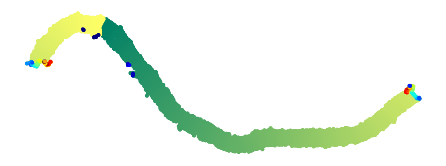

###############
Took 7.9 seconds to compute initial global embedding.
###############

Refining parameters and computing final global embedding...
Using GPA...
Iteration: 0
error: 0.0032476461589830167


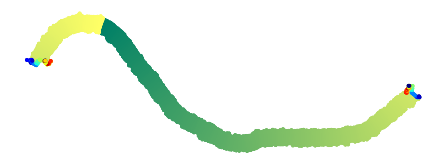

Iteration: 1
error: 0.003254437791637014
Iteration: 2
error: 0.0032586373324420613
Iteration: 3
error: 0.003264197577846872
Iteration: 4
error: 0.0032700350572989643
Iteration: 5
error: 0.0032756616669436813


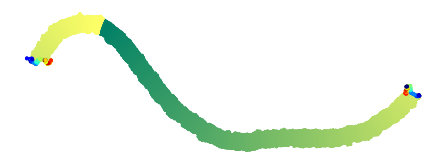

Iteration: 6
error: 0.0032810691200421097
Iteration: 7
error: 0.003286160792562
Iteration: 8
error: 0.0032907881786028016
Iteration: 9
error: 0.0032954766427671102
Iteration: 10
error: 0.003299685891280411


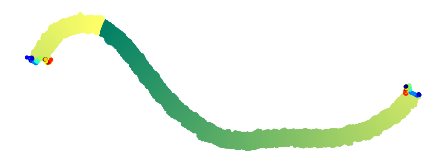

Iteration: 11
error: 0.0033038386474306563
Iteration: 12
error: 0.003307708467506214
Iteration: 13
error: 0.0033114041722591067
Iteration: 14
error: 0.003314832538598272
Iteration: 15
error: 0.003318603001028432


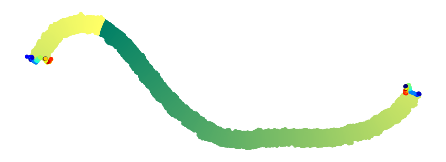

Iteration: 16
error: 0.003321755448929528
Iteration: 17
error: 0.003325031160087302
Iteration: 18
error: 0.003328254841315128
Iteration: 19
error: 0.0033314071061009078


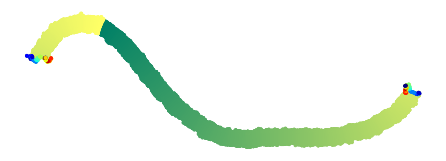

###############
Took 303.1 seconds to refine global embedding.
###############
###############
Took 312.7 seconds to perform step 3: compute global embedding.
###############


In [6]:
ldle_obj.fit()

# Optionally save for further visualizations using Visualization.ipynb

In [7]:
save_path = save_dir_root+'/ldle_obj.dat'
with open(save_path, "wb") as f:
    pickle.dump([X, labelsMat, ldle_obj], f)

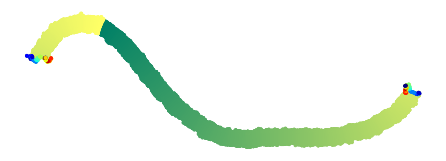

In [8]:
%matplotlib inline
ldle_obj.vis.global_embedding(ldle_obj.y_final, labelsMat[:,0], 'summer',
                             ldle_obj.color_of_pts_on_tear_final, 'jet', 'LDLE0_jet')

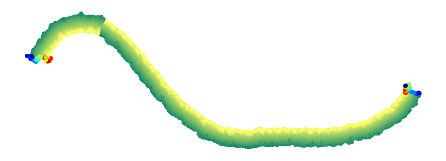

In [9]:
%matplotlib inline
ldle_obj.vis.global_embedding(ldle_obj.y_final, labelsMat[:,1], 'summer',
                             ldle_obj.color_of_pts_on_tear_final, 'jet', 'LDLE1_jet')

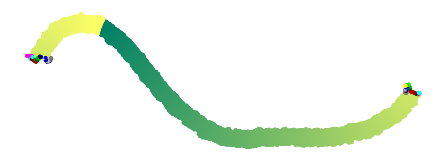

In [10]:
%matplotlib inline
ldle_obj.vis.global_embedding(ldle_obj.y_final, labelsMat[:,0], 'summer',
                             ldle_obj.color_of_pts_on_tear_final, 'colorcube', 'LDLE0_colorcube')

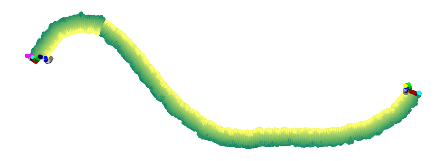

In [11]:
%matplotlib inline
ldle_obj.vis.global_embedding(ldle_obj.y_final, labelsMat[:,1], 'summer',
                             ldle_obj.color_of_pts_on_tear_final, 'colorcube', 'LDLE1_colorcube')

# LTSA

In [12]:
from matplotlib import pyplot as plt
from sklearn.manifold import LocallyLinearEmbedding
import visualize
vis = visualize.Visualize(save_dir_root)

5


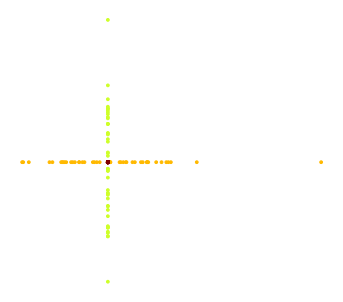

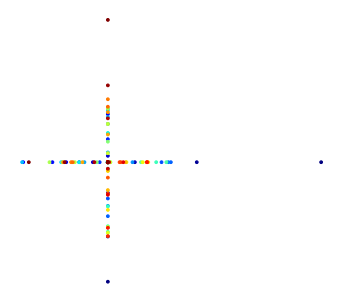

10


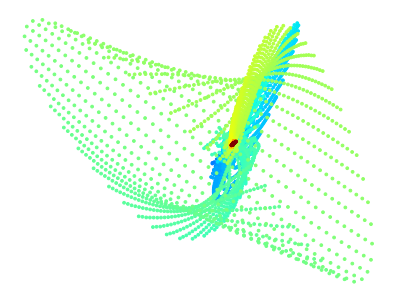

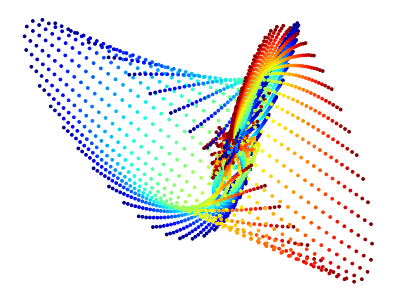

25


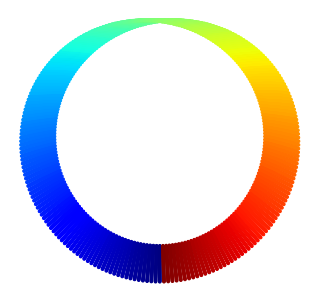

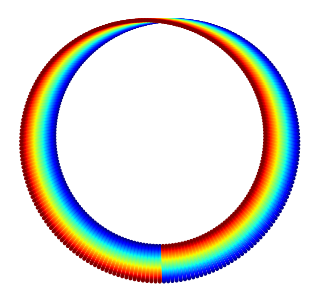

15


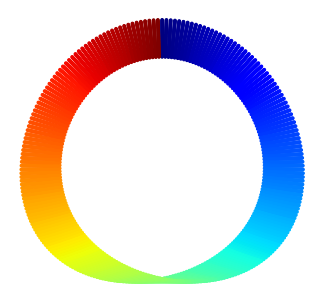

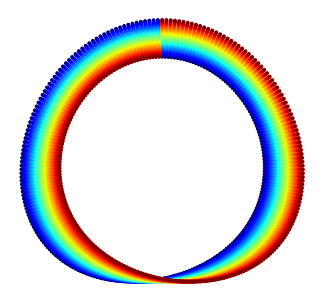

75


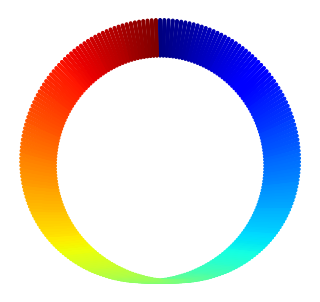

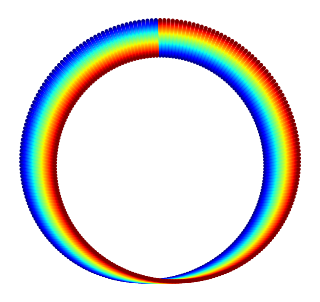

100


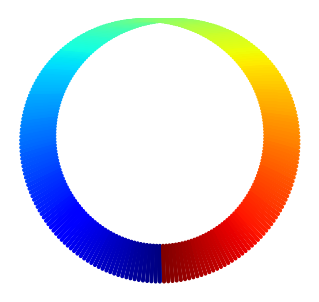

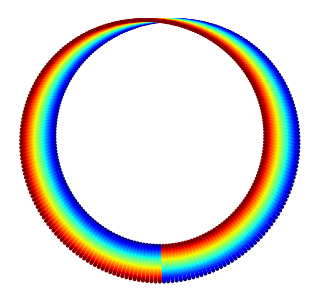

In [13]:
for n_neighbors in [5,10,25,15,75,100]:
    print(n_neighbors)
    ltsa_obj = LocallyLinearEmbedding(method='ltsa', n_neighbors=n_neighbors,
                                      n_components=2, n_jobs=-1, random_state=42)
    y_ltsa = ltsa_obj.fit_transform(X)
    vis.global_embedding(y_ltsa, labelsMat[:,0], 'jet', title='LTSA0_'+str(n_neighbors))
    plt.show()
    vis.global_embedding(y_ltsa, labelsMat[:,1], 'jet', title='LTSA1_'+str(n_neighbors))
    plt.show()

# UMAP

In [14]:
from umap import UMAP
import visualize
vis = visualize.Visualize(save_dir_root)

25 0.01


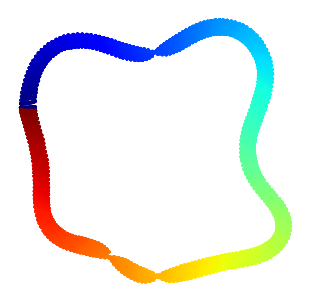

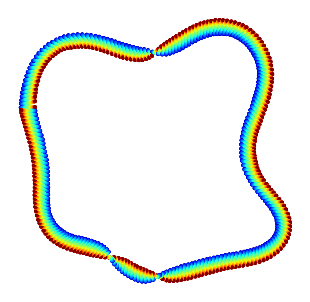

25 0.1


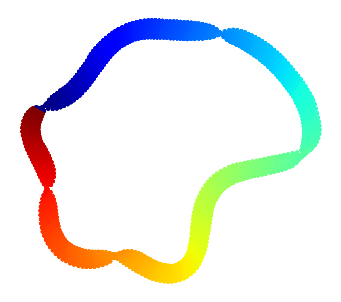

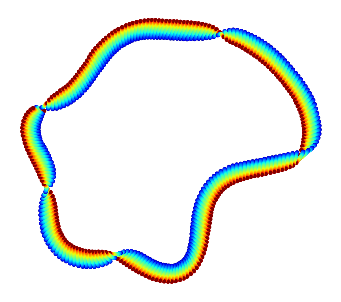

25 0.25


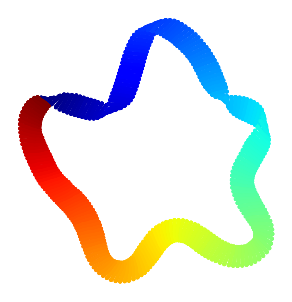

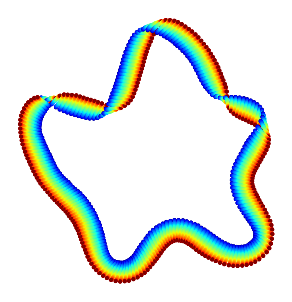

25 0.5


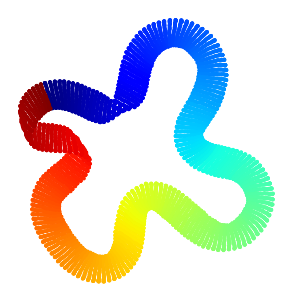

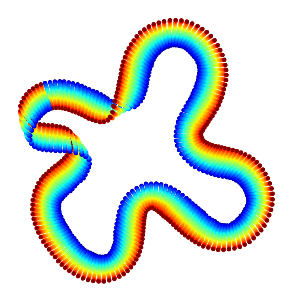

50 0.01


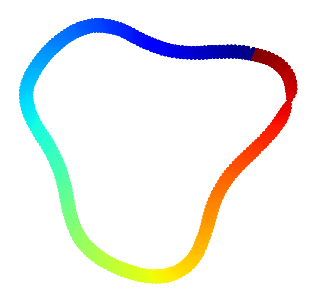

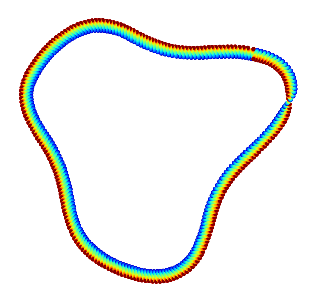

50 0.1


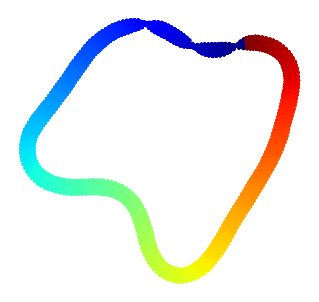

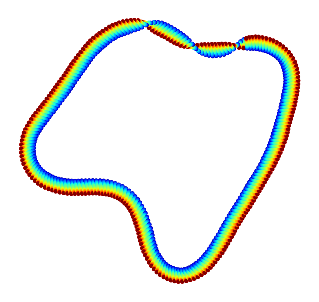

50 0.25


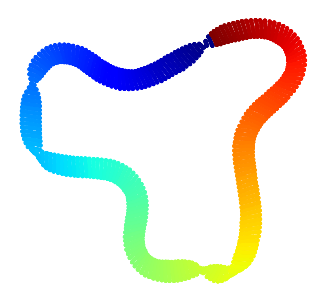

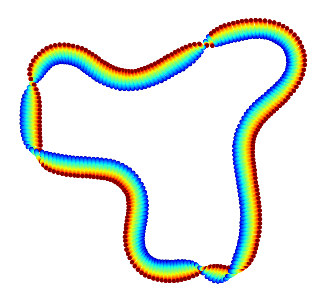

50 0.5


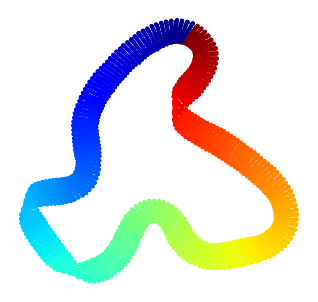

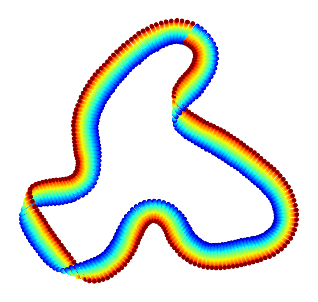

100 0.01


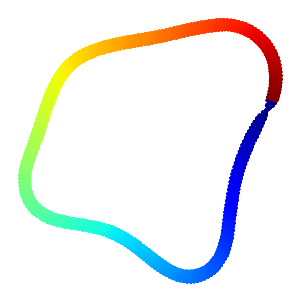

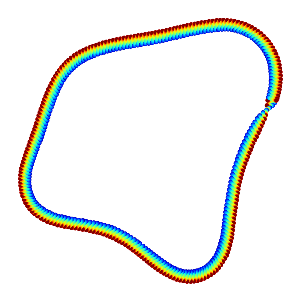

100 0.1


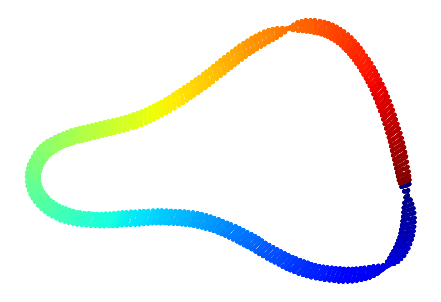

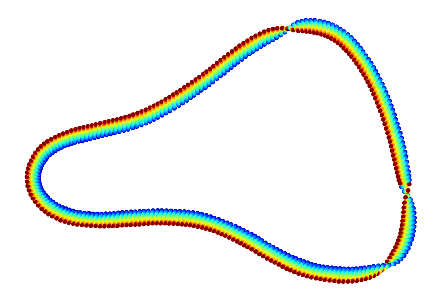

100 0.25


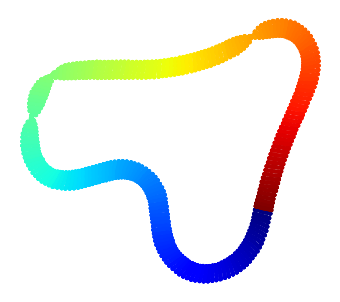

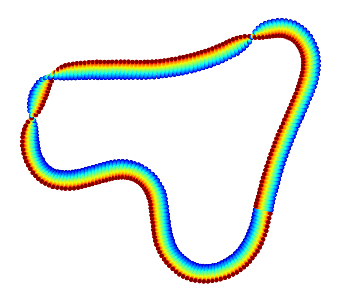

100 0.5


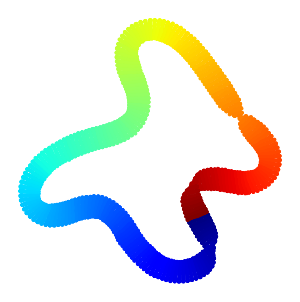

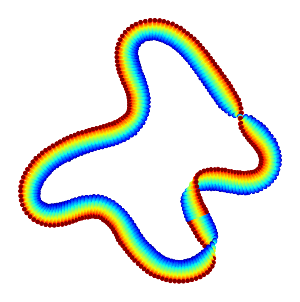

200 0.01


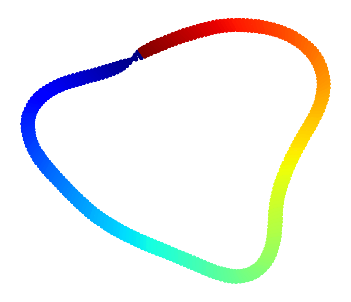

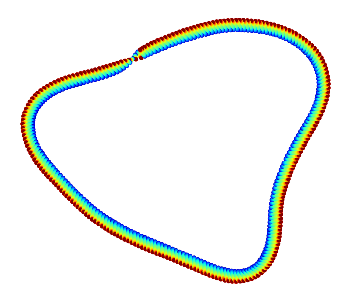

200 0.1


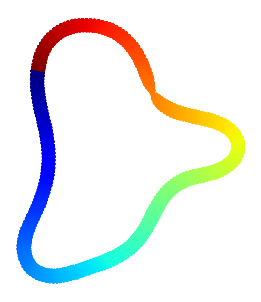

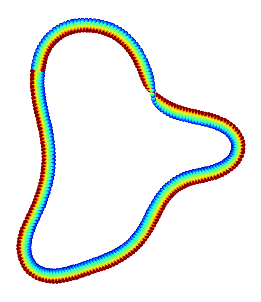

200 0.25


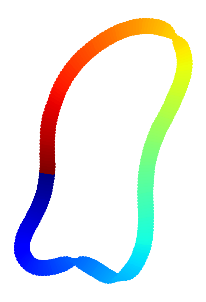

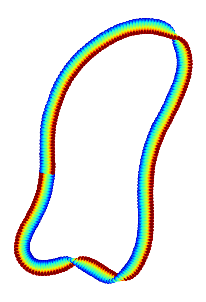

200 0.5


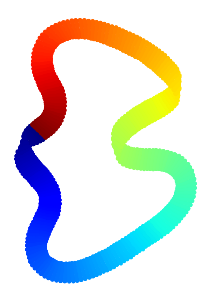

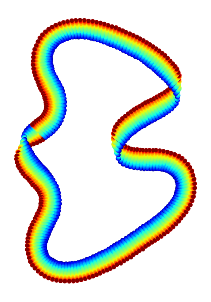

In [15]:
for n_neighbors in [25,50,100,200]:
    for min_dist in [0.01,0.1,0.25,0.5]:
        print(n_neighbors, min_dist)
        umap_obj = UMAP(n_neighbors=n_neighbors, min_dist=min_dist, n_components=2,
                        random_state=42, n_epochs=500, metric='euclidean')
        y_umap = umap_obj.fit_transform(X)
        vis.global_embedding(y_umap, labelsMat[:,0], 'jet', title='UMAP0_'+str(n_neighbors)+'_'+str(min_dist))
        plt.show()
        vis.global_embedding(y_umap, labelsMat[:,1], 'jet', title='UMAP1_'+str(n_neighbors)+'_'+str(min_dist))
        plt.show()

# t-SNE

In [16]:
from sklearn.manifold import TSNE
import visualize
vis = visualize.Visualize(save_dir_root)

30 2


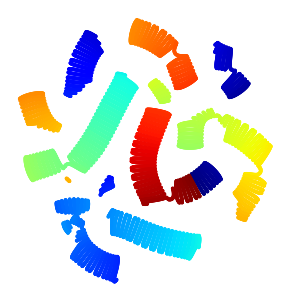

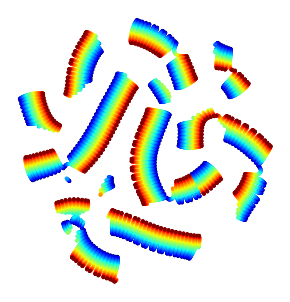

30 4


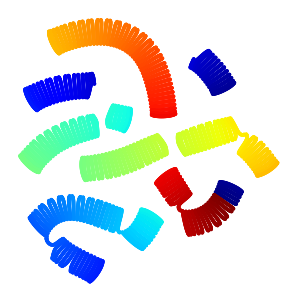

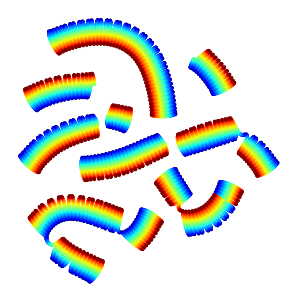

30 6


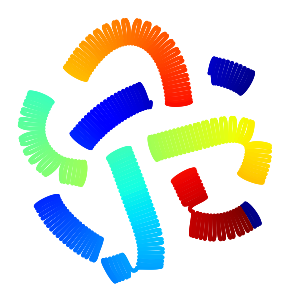

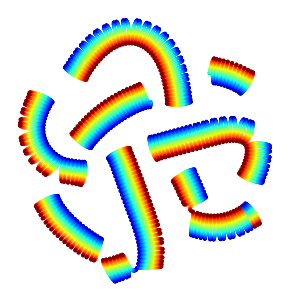

40 2


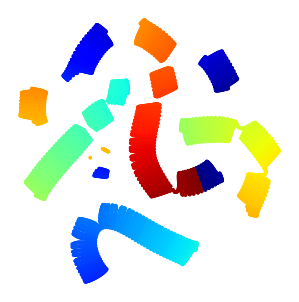

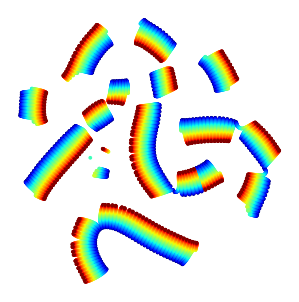

40 4


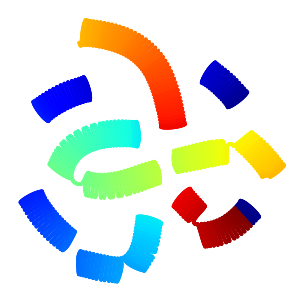

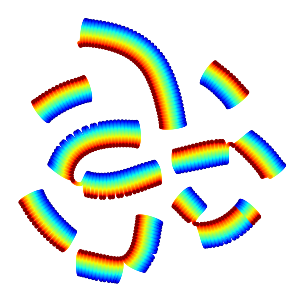

40 6


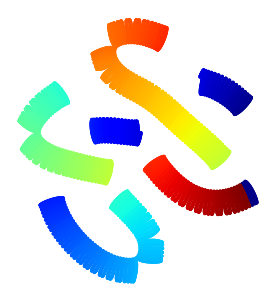

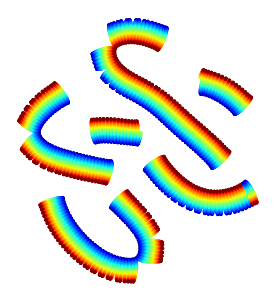

50 2


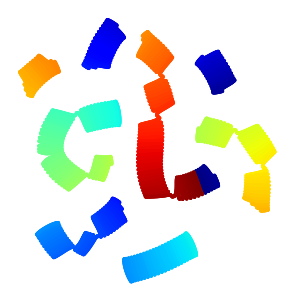

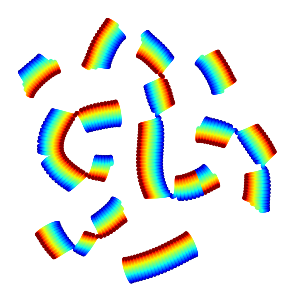

50 4


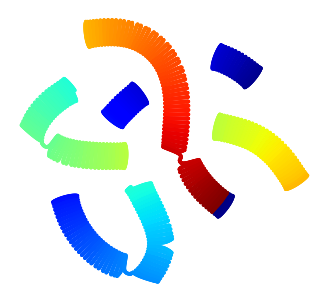

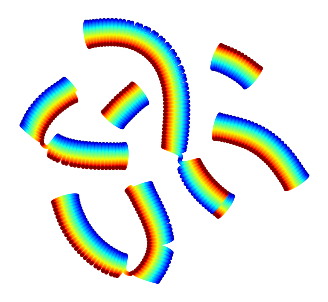

50 6


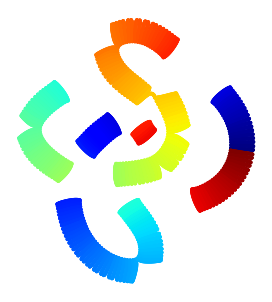

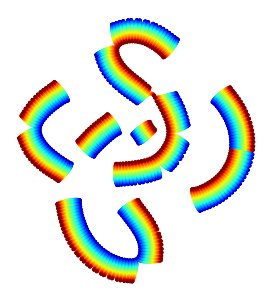

60 2


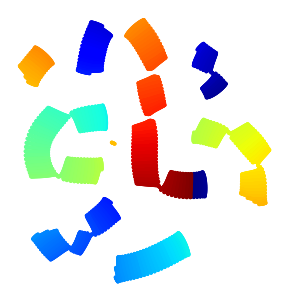

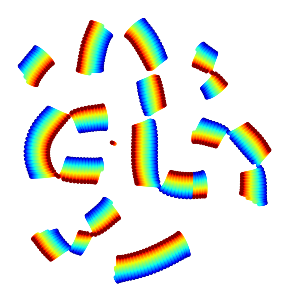

60 4


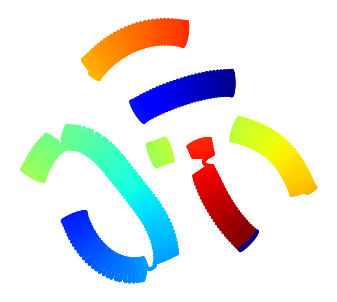

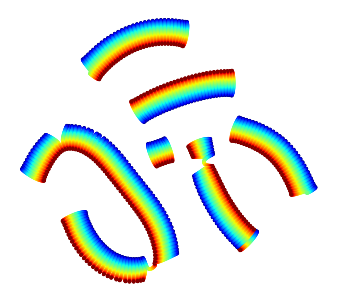

60 6


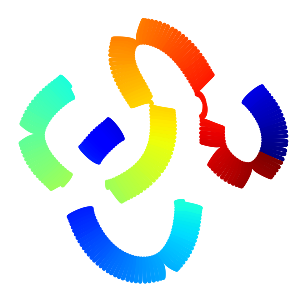

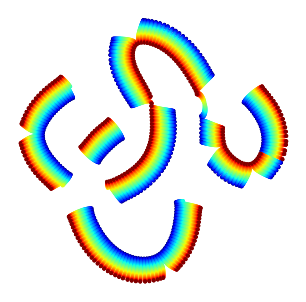

In [17]:
for perplexity in [30,40,50,60]:
    for ee in [2,4,6]:
        print(perplexity, ee)
        tsne_obj = TSNE(perplexity=perplexity, early_exaggeration=ee, n_components=2,
                        metric='euclidean', random_state=42, n_iter=1000,
                        n_jobs=-1, init='random')
        y_tsne = tsne_obj.fit_transform(X)
        vis.global_embedding(y_tsne, labelsMat[:,0], 'jet', title='t-SNE0_'+str(perplexity)+'_'+str(ee))
        plt.show()
        vis.global_embedding(y_tsne, labelsMat[:,1], 'jet', title='t-SNE1_'+str(perplexity)+'_'+str(ee))
        plt.show()